In [8]:
!ls

drive  model_architecture.py  sample_data  train_test.py


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

In [11]:
from model_architecture import *
from train_test import *

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 256
num_workers = 1
pin_memory = True
input_size = (3,32,32)

In [13]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import sys

torch.manual_seed(1)
#kwargs = {'num_workers': config.num_workers, 'pin_memory': config.pin_memory} if config.use_cuda else {}
kwargs = {'num_workers': num_workers, 'pin_memory': pin_memory} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.RandomCrop(32, padding=4),
                       transforms.RandomHorizontalFlip(),
                       transforms.RandomRotation((-8.0, 8.0)),                                                 
                       #transforms.RandomRotation((-8.0, 8.0), fill=(1,)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                   ])),
    #batch_size=config.batch_size, shuffle=True, **kwargs)
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])),
    #batch_size=config.batch_size, shuffle=True, **kwargs)
    batch_size=batch_size, shuffle=True, **kwargs)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


In [14]:
from __future__ import print_function
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import sys


print(model_summary(Net(1), input_size))

accu = []
loss_test = []


model_ = Net(BN_flag=1).to(device)
optimizer = optim.SGD(model_.parameters(), lr=0.016, momentum=0.9)
scheduler = StepLR(optimizer, step_size=2, gamma=0.92)

valid_acc = []
loss_test_ = []
l1_regularization = [0, 0]
for epoch in range(1, 26):
    train(model_, device, train_loader, optimizer, epoch, l1_regularization)
    scheduler.step()
    valid_a, valid_l = test(model_, device, test_loader)
    # Appending to loss and accuracy lists
    valid_acc.append(valid_a)
    loss_test_.append(valid_l)

accu.append(valid_acc)
loss_test.append(loss_test_)

import pickle
with open("Model_Params.pickle","wb") as f:
    pickle.dump(accu, f)
    pickle.dump(loss_test, f)

/content/model_architecture.py:181: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
  0%|          | 0/196 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
    GhostBatchNorm-2           [-1, 32, 32, 32]              64
            Conv2d-3           [-1, 32, 32, 32]           9,248
    GhostBatchNorm-4           [-1, 32, 32, 32]              64
           Dropout-5           [-1, 32, 32, 32]               0
         MaxPool2d-6           [-1, 32, 16, 16]               0
            Conv2d-7           [-1, 16, 18, 18]             528
    GhostBatchNorm-8           [-1, 16, 18, 18]              32
           Dropout-9           [-1, 16, 18, 18]               0
           Conv2d-10           [-1, 64, 18, 20]           3,136
   GhostBatchNorm-11           [-1, 64, 18, 20]             128
          Dropout-12           [-1, 64, 18, 20]               0
           Conv2d-13           [-1, 64, 20, 20]          12,352
   GhostBatchNorm-14           [-1, 64,

Epoch: 1,LR: 0.016.
Train set: train Average loss: 1.4402, train_Accuracy: 16977/50000 (33.9540%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.4235, Accuracy: 4741/10000 (47.4100%)



Epoch: 2,LR: 0.016.
Train set: train Average loss: 1.0737, train_Accuracy: 26144/50000 (52.2880%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3695, Accuracy: 5128/10000 (51.2800%)



Epoch: 3,LR: 0.01472.
Train set: train Average loss: 1.0551, train_Accuracy: 29650/50000 (59.3000%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1978, Accuracy: 5752/10000 (57.5200%)



Epoch: 4,LR: 0.01472.
Train set: train Average loss: 0.8369, train_Accuracy: 31609/50000 (63.2180%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9865, Accuracy: 6530/10000 (65.3000%)



Epoch: 5,LR: 0.013542400000000001.
Train set: train Average loss: 0.7747, train_Accuracy: 33210/50000 (66.4200%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9881, Accuracy: 6631/10000 (66.3100%)



Epoch: 6,LR: 0.013542400000000001.
Train set: train Average loss: 1.0210, train_Accuracy: 34185/50000 (68.3700%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8495, Accuracy: 7007/10000 (70.0700%)



Epoch: 7,LR: 0.012459008000000002.
Train set: train Average loss: 0.9185, train_Accuracy: 35312/50000 (70.6240%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7409, Accuracy: 7385/10000 (73.8500%)



Epoch: 8,LR: 0.012459008000000002.
Train set: train Average loss: 0.7857, train_Accuracy: 36172/50000 (72.3440%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7194, Accuracy: 7482/10000 (74.8200%)



Epoch: 9,LR: 0.011462287360000002.
Train set: train Average loss: 0.8293, train_Accuracy: 36714/50000 (73.4280%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7671, Accuracy: 7469/10000 (74.6900%)



Epoch: 10,LR: 0.011462287360000002.
Train set: train Average loss: 0.5648, train_Accuracy: 37297/50000 (74.5940%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6868, Accuracy: 7651/10000 (76.5100%)



Epoch: 11,LR: 0.010545304371200001.
Train set: train Average loss: 0.4290, train_Accuracy: 37952/50000 (75.9040%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6667, Accuracy: 7720/10000 (77.2000%)



Epoch: 12,LR: 0.010545304371200001.
Train set: train Average loss: 0.8322, train_Accuracy: 38283/50000 (76.5660%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6734, Accuracy: 7701/10000 (77.0100%)



Epoch: 13,LR: 0.009701680021504002.
Train set: train Average loss: 0.6703, train_Accuracy: 38673/50000 (77.3460%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5943, Accuracy: 8001/10000 (80.0100%)



Epoch: 14,LR: 0.009701680021504002.
Train set: train Average loss: 0.5136, train_Accuracy: 39052/50000 (78.1040%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6172, Accuracy: 7958/10000 (79.5800%)



Epoch: 15,LR: 0.008925545619783683.
Train set: train Average loss: 0.4490, train_Accuracy: 39389/50000 (78.7780%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5982, Accuracy: 8035/10000 (80.3500%)



Epoch: 16,LR: 0.008925545619783683.
Train set: train Average loss: 0.5662, train_Accuracy: 39585/50000 (79.1700%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5540, Accuracy: 8092/10000 (80.9200%)



Epoch: 17,LR: 0.008211501970200989.
Train set: train Average loss: 0.4799, train_Accuracy: 39877/50000 (79.7540%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5934, Accuracy: 8056/10000 (80.5600%)



Epoch: 18,LR: 0.008211501970200989.
Train set: train Average loss: 0.3895, train_Accuracy: 40031/50000 (80.0620%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5887, Accuracy: 8114/10000 (81.1400%)



Epoch: 19,LR: 0.007554581812584909.
Train set: train Average loss: 0.5800, train_Accuracy: 40287/50000 (80.5740%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5793, Accuracy: 8077/10000 (80.7700%)



Epoch: 20,LR: 0.007554581812584909.
Train set: train Average loss: 0.4615, train_Accuracy: 40405/50000 (80.8100%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5403, Accuracy: 8273/10000 (82.7300%)



Epoch: 21,LR: 0.006950215267578117.
Train set: train Average loss: 0.3747, train_Accuracy: 40620/50000 (81.2400%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5356, Accuracy: 8257/10000 (82.5700%)



Epoch: 22,LR: 0.006950215267578117.
Train set: train Average loss: 0.5903, train_Accuracy: 40773/50000 (81.5460%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5674, Accuracy: 8166/10000 (81.6600%)



Epoch: 23,LR: 0.006394198046171868.
Train set: train Average loss: 0.6750, train_Accuracy: 41013/50000 (82.0260%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5301, Accuracy: 8261/10000 (82.6100%)



Epoch: 24,LR: 0.006394198046171868.
Train set: train Average loss: 0.5726, train_Accuracy: 41084/50000 (82.1680%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5489, Accuracy: 8212/10000 (82.1200%)



Epoch: 25,LR: 0.005882662202478119.
Train set: train Average loss: 0.4675, train_Accuracy: 41266/50000 (82.5320%)




Test set: Average loss: 0.5264, Accuracy: 8309/10000 (83.0900%)



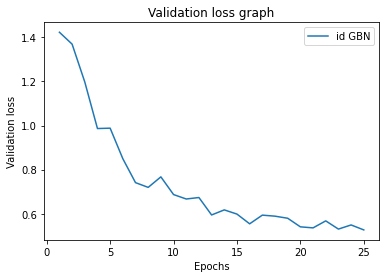

In [17]:
import matplotlib.pyplot as plt

x = [i for i in range(1,26)]
y = loss_test
Modelgraph = ['GBN']

plt.title("Validation loss graph")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
#plt.figure(figsize=(10,10))

for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
#plt.show()
plt.savefig('Validation loss graph')

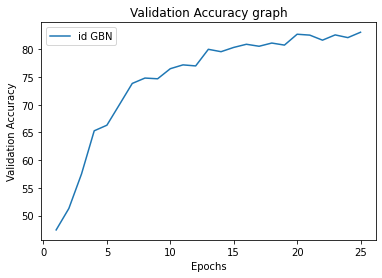

<Figure size 432x288 with 0 Axes>

In [18]:
x = [i for i in range(1,26)]
y = accu
Modelgraph = ['GBN']


plt.title("Validation Accuracy graph")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")


for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
plt.show()
plt.savefig('Validation Accuracy graph_')